#**IMAGE SEGMENTATION & OBJECT DETECTION**



MBA Tech CS

3rd year 5th semester

DM Group Project

#**A) Unsupervised Segmentation**

#1) Threshold Segmentation

In [ ]:
from skimage.color import rgb2gray  #skimage: collection of algorithms for image processing/computer vision.
import numpy as np
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import ndimage #n dimension. (used for IP)

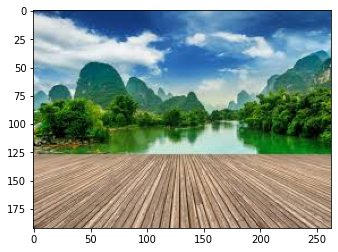

In [ ]:
image = plt.imread('1.jpeg')
image.shape
plt.imshow(image)

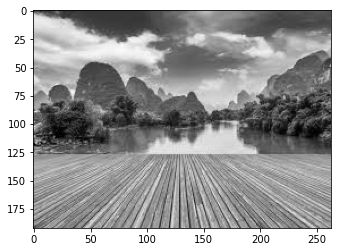

In [ ]:
gray = rgb2gray(image)   # converts rgb image to grey
plt.imshow(gray, cmap='gray')   

In [ ]:
gray.shape

(192, 263)

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])  # multiplying the dimensions and meriging it into one.
gray_r.shape

(50496,)

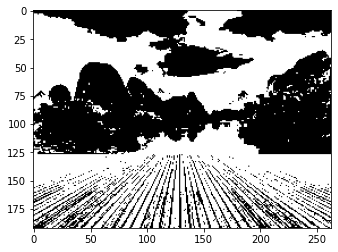

In [ ]:
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():    #taking threshold as mean if pixel value greater than mean change it to 1 Else to 0.
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

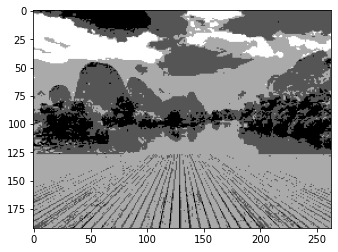

In [ ]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():   # 1st threshold is mean. if greater than mean then change pixel val to 3
        gray_r[i] = 3
    elif gray_r[i] > 0.5:  # similarly for threshold> 0.5
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

#2) Edge Based Segmentation


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import filters
import skimage

In [ ]:
image = cv2.imread("b.png", 0)   

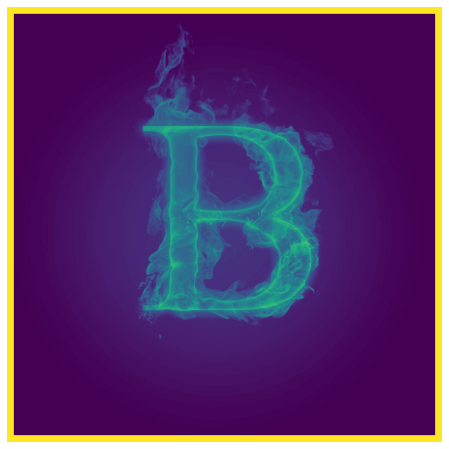

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")  # removes x and y axis of plot
plt.show()

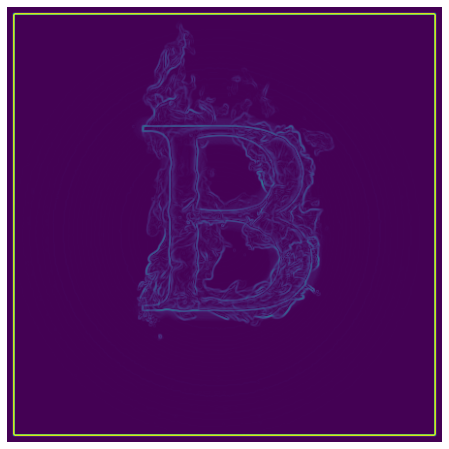

In [ ]:
#Sobel Edge operator
sobel_image = filters.sobel(image)   #apply sobel operator (used for edge detection.)
plt.figure(figsize=(8, 8))
plt.imshow(sobel_image)
plt.axis("off")
plt.show()

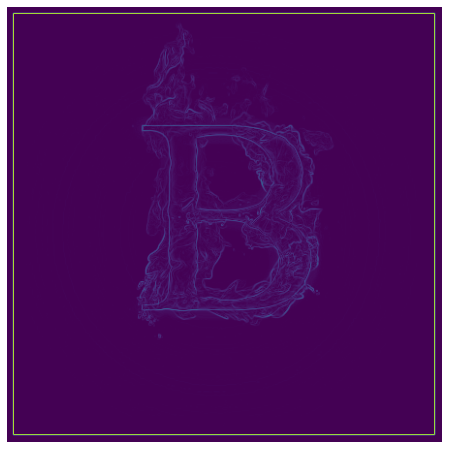

In [ ]:
#Roberts Edge operator
roberts_image = filters.roberts(image)
plt.figure(figsize=(8, 8))
plt.imshow(roberts_image)
plt.axis("off")
plt.show()

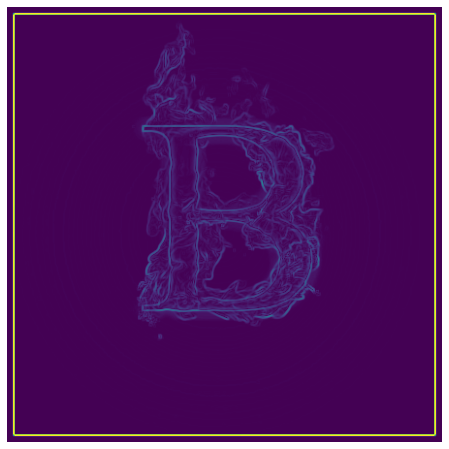

In [ ]:
#Prewitt edge operator
prewitt_image = filters.prewitt(image)
plt.figure(figsize=(8, 8))
plt.imshow(prewitt_image)
plt.axis("off")
plt.show()

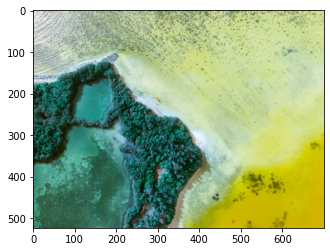

In [ ]:
#Canny edge operator
img1 = cv2.imread("img1.jpeg")
plt.imshow(img1)

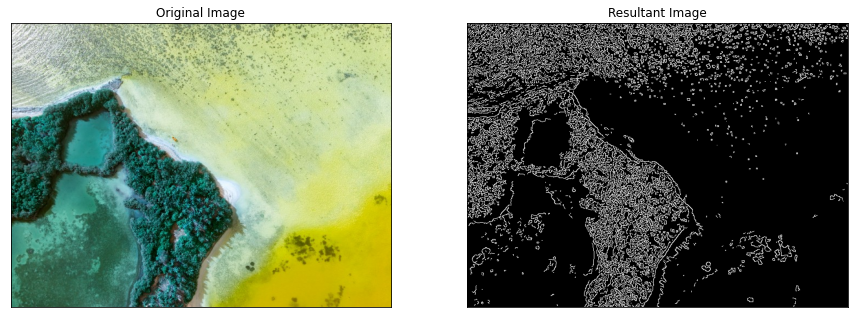

In [ ]:
edges = cv2.Canny(img1, 150, 200)
plt.figure(figsize = (figure_size, figure_size))
plt.subplot(1, 2, 1), plt.imshow(img1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(edges, cmap = 'gray')
plt.title('Resultant Image'), plt.xticks([]), plt.yticks([])
plt.show()

#3) Unsupervised Image Segmentation using KMeans

**1st method**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

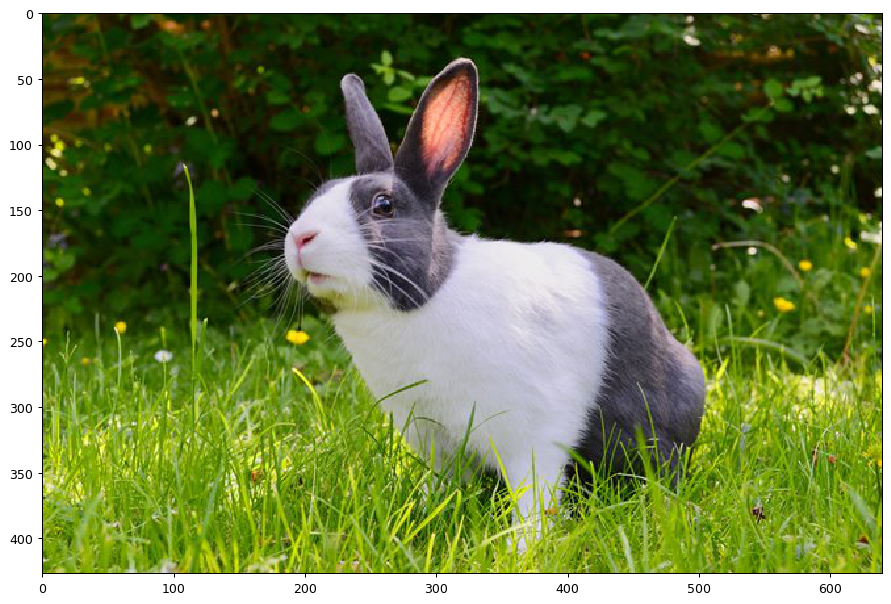

In [ ]:
rabbit = imread('rabbit.jpg')
plt.figure(num = None, figsize = (10, 12), dpi = 90)  # dpi= dots per inch
imshow(rabbit);

In [ ]:
def image_to_pandas(image):
    df = pd.DataFrame([image[:, :, 0].flatten(),
                       image[:, :, 1].flatten(),
                       image[:, :, 2].flatten()]).T
    df.columns = ['Red_Channel','Green_Channel','Blue_Channel']
    return df
df_rabbite = image_to_pandas(rabbit)   #plotting images in the 3 planes (RGB)
df_rabbite.head(15)
#  makes the manipulation of the image simpler as it is easier

Red_Channel  Green_Channel  Blue_Channel
0            25             72             4
1            31             71             8
2            39             70            11
3            48             69            13
4            57             66            13
5            68             65            10
6            76             66             7
7            82             68             3
8            82             68             0
9            80             71             0
10           74             76             0
11           69             81             0
12           61             84             6
13           51             82            12
14           40             79            14

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


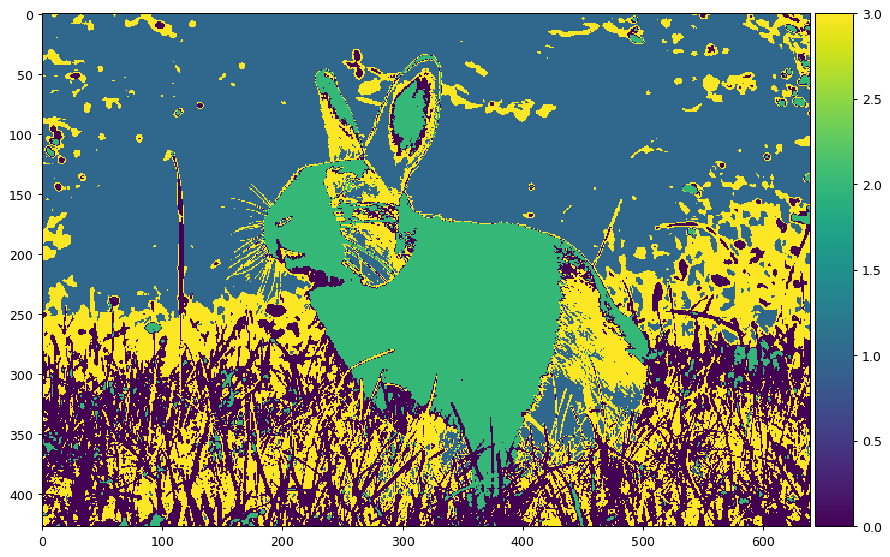

In [ ]:
plt.figure(num = None, figsize = (10, 12), dpi = 90)
kmeans = KMeans(n_clusters = 4, random_state = 42).fit(df_rabbite)
result = kmeans.labels_.reshape(rabbit.shape[0], rabbit.shape[1])
imshow(result, cmap = 'viridis')
plt.show()

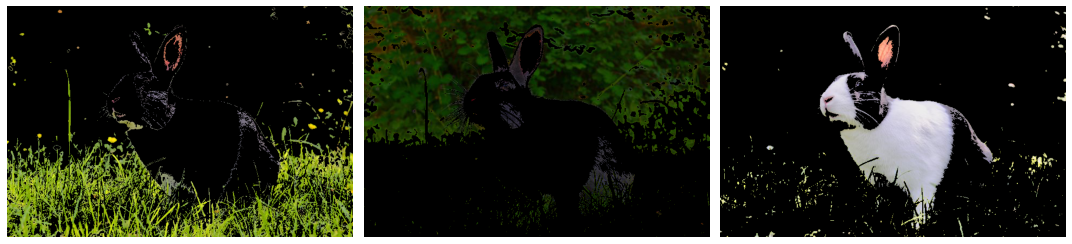

In [ ]:
# apply each cluster as a separate mask to image.
fig, axes = plt.subplots(1, 3, figsize = (15, 12))
for n, ax in enumerate(axes.flatten()):
    rabbit = imread('rabbit.jpg')
    rabbit[:, :, 0] = rabbit[:, :, 0]*(result==[n])
    rabbit[:, :, 1] = rabbit[:, :, 1]*(result==[n])
    rabbit[:, :, 2] = rabbit[:, :, 2]*(result==[n])
    ax.imshow(rabbit);
    ax.set_axis_off()
fig.tight_layout()
# 3 clusters: grass, rabbit and sky

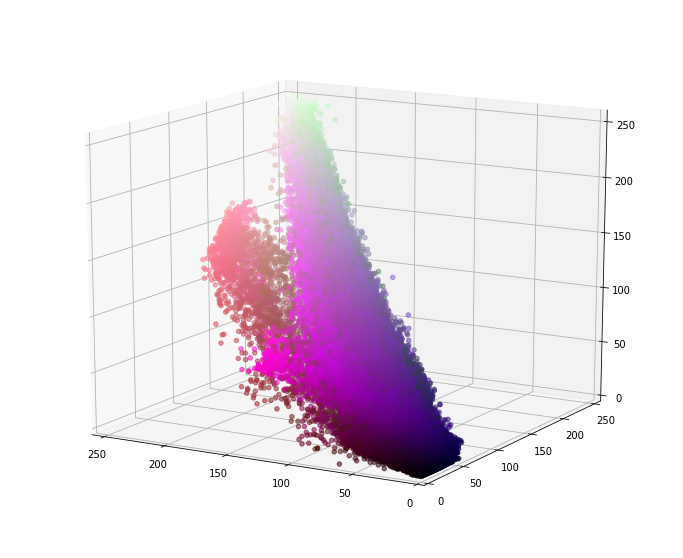

In [ ]:
def pixel_plotter(df):
    x_3d = df['Red_Channel']
    y_3d = df['Green_Channel']
    z_3d = df['Blue_Channel']
    
    color_list = list(zip(df['Red_Channel'].to_list(),
                          df['Blue_Channel'].to_list(),
                          df['Green_Channel'].to_list()))
    norm = colors.Normalize(vmin=0, vmax=1.)
    norm.autoscale(color_list)
    p_color = norm(color_list).tolist()
    
    fig = plt.figure(figsize=(12,10))
    ax_3d = plt.axes(projection='3d')
    ax_3d.scatter3D(xs = x_3d, ys =  y_3d, zs = z_3d, c = p_color, alpha = 0.55);
    ax_3d.set_xlim3d(0, x_3d.max())
    ax_3d.set_ylim3d(0, y_3d.max())
    ax_3d.set_zlim3d(0, z_3d.max())
    ax_3d.invert_zaxis()
    ax_3d.view_init(-165, 60)
pixel_plotter(df_rabbite)

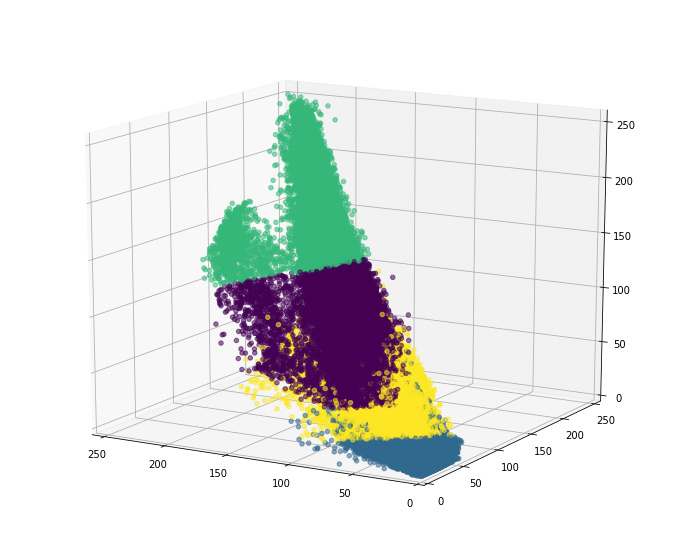

In [ ]:
df_rabbite['cluster'] = result.flatten()
def pixel_plotter_clusters(df):
    x_3d = df['Red_Channel']
    y_3d = df['Green_Channel']
    z_3d = df['Blue_Channel']
    
    fig = plt.figure(figsize=(12,10))
    ax_3d = plt.axes(projection='3d')
    ax_3d.scatter3D(xs = x_3d, ys =  y_3d, zs = z_3d, c = df['cluster'], alpha = 0.55);
    ax_3d.set_xlim3d(0, x_3d.max())
    ax_3d.set_ylim3d(0, y_3d.max())
    ax_3d.set_zlim3d(0, z_3d.max())
    ax_3d.invert_zaxis()
    ax_3d.view_init(-165, 60)
pixel_plotter_clusters(df_rabbite)

#Image Segmentation using KMeans

**2nd method**

(192, 263, 3)


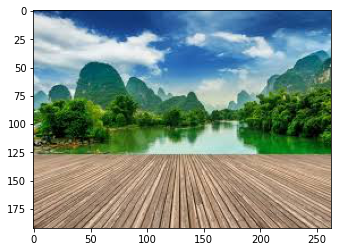

In [ ]:
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [ ]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])  # reshaping it into the given size
pic_n.shape

(50496, 3)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

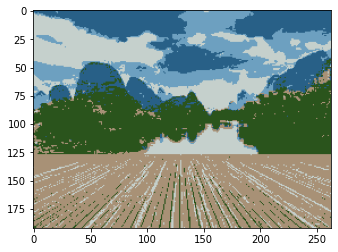

In [ ]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

#Image Segmentation using KMeans - Color Clustering

**3rd method**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

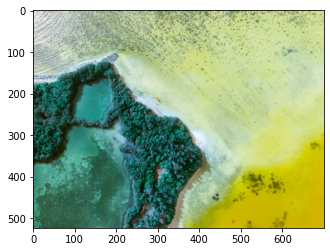

In [ ]:
original_image = cv2.imread("img1.jpeg")
plt.imshow(original_image)

In [ ]:
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [ ]:
vectorized = img.reshape((-1, 3))  #unknown rows and 3 columns.
vectorized = np.float32(vectorized)  #  Need to convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# TERM_CRITERIA_EPS: stops the algorithm iteration if specified accuracy, epsilon, is reached.
# TERM_CRITERIA_MAX_ITER: stops the algorithm after the specified number of iterations, max_iter.

In [ ]:
K = 3   #  k = 3 because the image above has 3 colors, green-colored grass and forest, blue sea and the greenish-blue seashore
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
#  cv2.kmeans(samples, nclusters(K), criteria, attempts, flags) 
# attempt: Flag to specify the number of times the algorithm is executed using different initial labelings
center = np.uint8(center)

In [ ]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

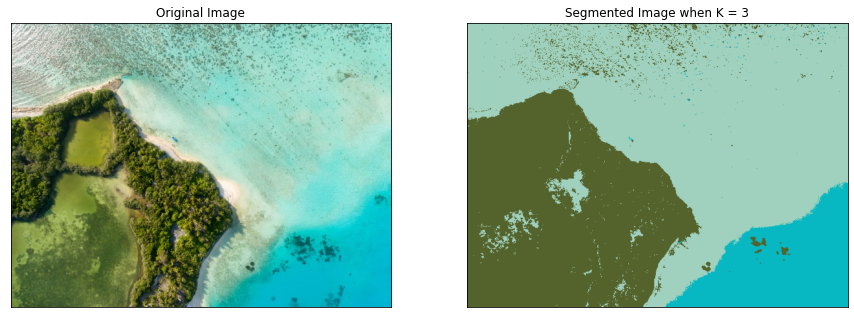

In [ ]:
figure_size = 15
plt.figure(figsize = (figure_size, figure_size))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#with a different value of K
K = 5
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

In [ ]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

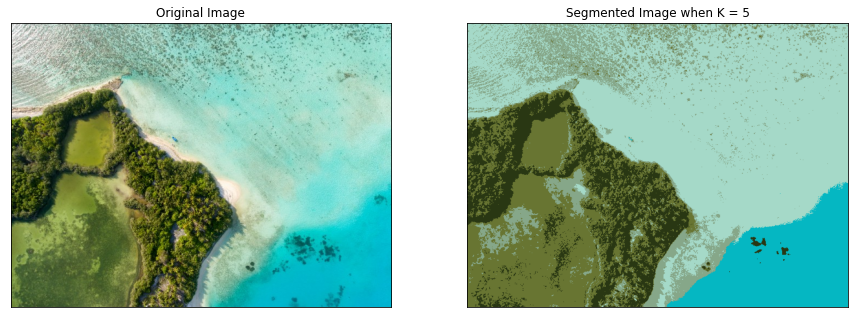

In [ ]:
figure_size = 15
plt.figure(figsize = (figure_size, figure_size))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

#4) Segmentation by DBSCAN 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

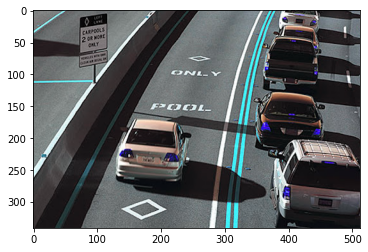

In [ ]:
img = cv2.imread('lane.jpg')
plt.imshow(img)

In [ ]:
Z = np.float32(img.reshape((-1, 3)))
db = DBSCAN(eps = 0.3, min_samples = 100).fit(Z[:, : 2])  #min pts=100

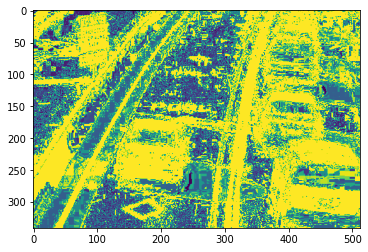

In [ ]:
plt.imshow(np.uint8(db.labels_.reshape(img.shape[: 2])))  # reshaping btw 0-255 
plt.show()

#**B) Supervised Segmentation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Scikit-image, or skimage, is an open source Python package designed for image preprocessing.
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

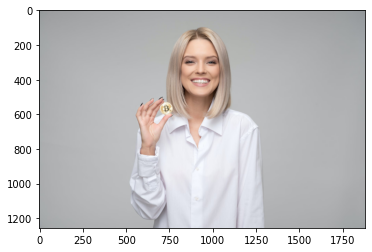

In [ ]:
from skimage import io
image = io.imread('girl.jpeg') 
plt.imshow(image);

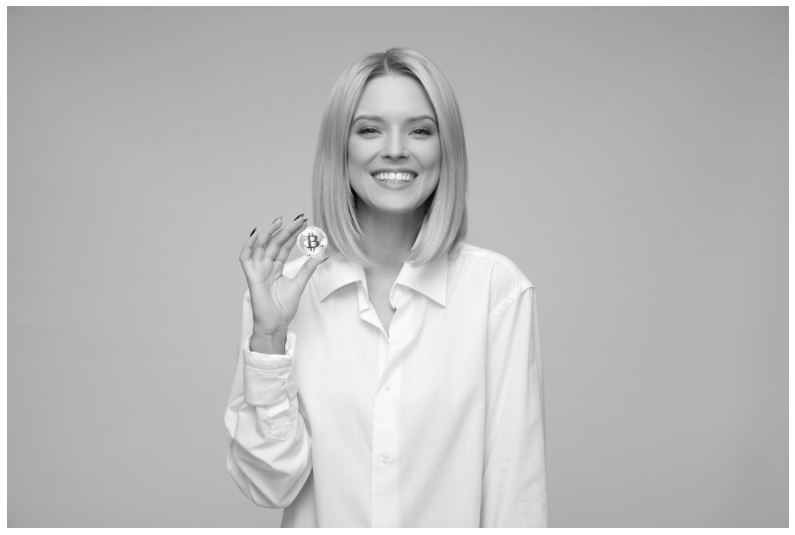

In [ ]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

In [ ]:
#Active Contour segmentation, also called snakes
def circle_points(resolution, center, radius):
    
    #Generate points which define a circle on an image. Centre refers to the centre of the circle
# linespace: Return evenly spaced numbers over a specified interval
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)          #polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [300, 930], 250)[:-1]

In [ ]:
def image_show(image, nrows = 1, ncols = 1, cmap='gray'):
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (14, 14))
    ax.imshow(image, cmap = 'gray')
    ax.axis('off')
    return fig, ax

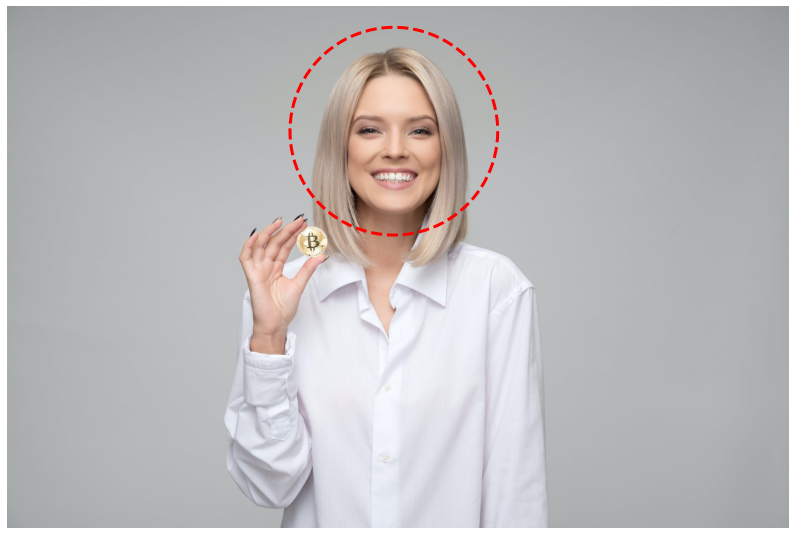

In [ ]:
fig, ax = image_show(image) # calling function
ax.plot(points[:, 0], points[:, 1], '--r', lw = 3)  #lw=line width, #--r=red

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


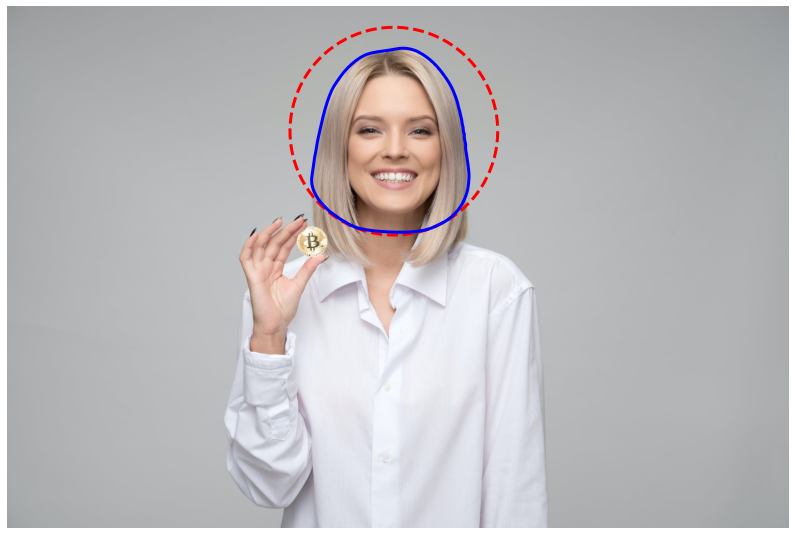

In [ ]:
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

# **C) Semantic Segmentation**

PixelLib is a library created for performing image and video segmentation. It is a flexible library created to allow easy integration of image and video segmentation into software solutions.
PixelLib supports two deep learning libraries for image segmentation which are Pytorch and Tensorflow. 
It supports the two major types of image segmentation:
1. Semantic segmentation
2. Instance segmentation 

In [ ]:
!pip install pixellib

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


PixelLib is implemented with Deeplabv3+ framework to perform semantic segmentation.

It is the process of segmenting the image pixels into their respective classes. Objects classified with the same pixel values are segmented with the same colormaps. 

semantic_segmentation() - Partitions the image into meaningful parts while at the same time, associates every pixel in an input image with a class label (i.e., person, road, car, bus, etc.)

Pascal VOC is a collection of datasets for object detection.

segmentAsPascalvoc - is the line of code that performs segmentation on an image and the segmentation is done in the pascalvoc’s color format. This function takes in two parameters:

path_to_image: the path to the image to be segemented.

path_to_output_image: the path to save the output image. The image will be saved in your current working directory.

In [ ]:
import pixellib
from pixellib.semantic import semantic_segmentation

segment_image = semantic_segmentation()
segment_image.load_pascalvoc_model("/content/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5") 
segment_image.segmentAsPascalvoc("sample1.jpeg", output_image_name = "image_new1.jpg")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed Image saved successfuly in your current working directory.


({'class_ids': array([ 0, 12, 13, 15]),
  'masks': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]])},
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
   

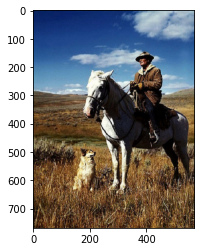

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('sample1.jpeg') 
plt.imshow(image);

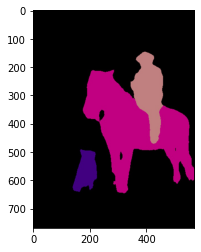

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('image_new1.jpg') 
plt.imshow(image);

In [ ]:
import pixellib
from pixellib.semantic import semantic_segmentation

segment_image = semantic_segmentation() 
segment_image.load_pascalvoc_model("/content/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5") 
segment_image.segmentAsPascalvoc("sample1.jpeg", output_image_name = "image_new2.jpg", overlay = True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed Image saved successfully in your current working directory.


({'class_ids': array([ 0, 12, 13, 15]),
  'masks': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]])},
 array([[[ 3, 10, 29],
         [ 3, 11, 29],
         [ 3, 11, 29],
         ...,
         [55, 64, 65],
         [55, 64, 66],
         [55, 64, 66]],
 
        [[ 2, 10, 28],
         [ 3, 10, 29],
         [ 3, 11, 29],
         ...,
         [53, 62, 64],
         [54, 63, 64],
         [54, 63, 65]],
 
        [[ 2,  9, 27],
         [ 2, 10, 28],
         [ 2, 10, 28],
         ...,
         [52, 61, 63],
         [53, 61, 63],
         [53, 62, 63]],
 
        ...,
 
        [[ 4,  3,  4],
         [ 4,  1,  1],
         [11,  7,  4],
         ...,
         [30, 19, 11],


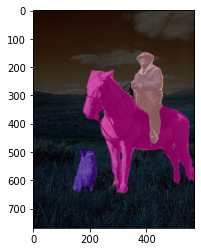

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('image_new2.jpg') 
plt.imshow(image);

#**D) Instance Segmentation**

Instance segmentation with PixelLib is based on Mask R-CNN framework.The Mask R_CNN model is trained on Microsoft Coco dataset, a dataset with 80 common object categories. The model can perform instance segmentation on these object categories. The Mask R-CNN returns the binary object mask in addition to class label and object bounding box. Mask R-CNN is good at pixel level segmentation. 

Instance segmentation is the task of detecting and delineating each distinct object of interest appearing in an image. It differs from semantic segmentation because different instances of the same object are segmented with different color maps. 

In [ ]:
import pixellib
from pixellib.instance import instance_segmentation

segment_image = instance_segmentation()
segment_image.load_model("/content/drive/MyDrive/mask_rcnn_coco.h5") 
segment_image.segmentImage("sample2.jpeg", output_image_name = "image_new3.jpg")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed image saved successfully in your current working directory.


({'class_ids': array([ 1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,
          1,  1,  1, 10,  1,  1, 25, 25, 25, 25,  3,  1,  2,  1, 25, 27,  1,
          1,  3, 27,  1, 25,  1, 25], dtype=int32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, F

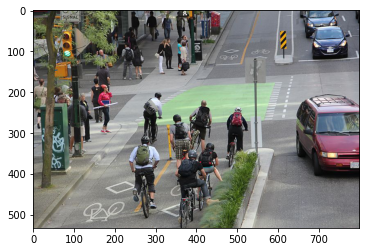

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('sample2.jpeg') 
plt.imshow(image);

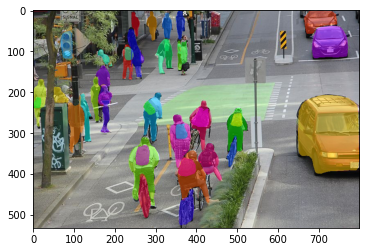

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('image_new3.jpg') 
plt.imshow(image);

Use segmentImage function for image segmentation, pass input image and output image name, and make show_bboxes parameter True for bounding box object detection

In [ ]:
import pixellib
from pixellib.instance import instance_segmentation

segment_image = instance_segmentation()
segment_image.load_model("/content/drive/MyDrive/mask_rcnn_coco.h5") 
segment_image.segmentImage("sample2.jpeg", output_image_name = "image_new4.jpg", show_bboxes = True)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed image saved successfully in your current working directory.


({'class_ids': array([ 1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,
          1,  1,  1, 10,  1,  1, 25, 25, 25, 25,  3,  1,  2,  1, 25, 27,  1,
          1,  3, 27,  1, 25,  1, 25], dtype=int32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, F

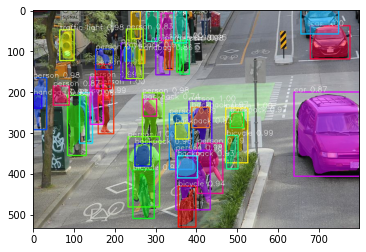

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('image_new4.jpg') 
plt.imshow(image);

#**Conclusion:** 

*   In our project, we demonstrated various techniques of Image Segmentation(one of the most important areas of Digital Image Processing) using our Python and Machine Learning skills. 
*   Under Unsupervised Segmentation, we discussed Threshold Segmentation, Edge-based Segmentation, KMeans Segmentation and DBSCAN Segmentation. 
*   We used Supervised Segmentation to detect the object of an image, or the face of a person. 
*   We learnt that Semantic Segmentation partitions the image into meaningful parts while at the same time, associates every pixel in an input image with a class label (i.e., person, road, car, bus, etc.). 
*   Finally, Instance Segmentation is the task of detecting and delineating each distinct object of interest appearing in an image. 



